In [1]:
import copy
import pandas as pd
import numpy as np
import feather

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)

In [3]:
DATA_PATH = '../data/'
df =  feather.read_dataframe(DATA_PATH + 'housing_with_supply')

In [4]:
df.price.isna().sum()

1272

In [5]:
df.price.value_counts()

$750              119
FREE               95
$800               63
$900               60
$1,300             59
$950               57
$1,000             56
Contact seller     45
$1,369             40
$1                 36
$1,100             34
$1,200             30
$2,000             30
$1,500             29
$25                29
$2,200             28
$850               27
$1,400             27
$2,250             26
$109               25
$700               25
$2,300             24
$2,700             24
$650               22
$2,100             22
$1,800             21
$50                21
$1,850             20
$2,500             19
$2,800             19
                 ... 
$3,510              1
2 100 $             1
$1,630              1
$2,616              1
$160                1
$290                1
$1,075              1
$299                1
1 300 $             1
$1,480              1
৳2,000              1
$710                1
$2,275              1
$840                1
$1,035    

In [6]:
df[df.price =='FREE'].text.sample(10)

2554    542 ferry st everett ..... cualquier pregunta nos puede llamar al 617 3720261 ... atendemos los ...
2324               free for reviewers us uk de jp pm me with your amazon profile if you have any interest .
3348    permanent accommodation available for 1 girl in 1 bhk starting january 2019 . - friendly roommat...
3168                                                                                                       
2420    i have 2 twin full mattresses and stands all in really good condition ( used less than 6 months ...
1883    during this holiday time of giving and being grateful , i wanted to share with this group a fun ...
3382                                                                                                       
3104    we like to inform our customers we will also be working with doing tile & painting we will expan...
2419                                                                                       what 04248841674
3106    esta pessoa . se cha

In [7]:
df[df.price =='$1'].text.sample(10)

1625                                                                                                       
3325                                                               pueden hacer sus ordenes estoy ala orden
1598    available for pick up now : ikea floor lamp with two led spot lights ( height adjustable ) - $ 4...
3172    1 . ceramic space heater $ 20 2 . set of 4 placemats 15 inches diameter $ 6 3 . cube organizer 4...
2617    jkr cleaning services about us jkr cleaning servicesjanitorial services in acton , ma we are a l...
3379                                                                                                       
3452    listen , read , jkr has the best offer for you 1 ) we give you estimate absolutely free 2 ) if y...
1596    we can provide you with exceptional cleaning services for an affordable price that fits your bud...
1329    need a place to crash @ night from 01 / 19 - 01 / 26 . i will be doing a course on campus , 8am ...
2754                        

Probably low prices all trash, get rid of them.

In [8]:
df.loc[df.price == 'Contact seller', 'price'] = None
df = df[df.price != 'FREE']

In [9]:
df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.price = df.price.str.replace(' ', '')

In [10]:
df[df.price.notna()].price

15       865
16      1780
17      1225
40       900
42       700
55      1150
72       850
109      650
130      660
137      660
146     1265
147     1265
160      675
170     2400
175      800
178     1400
191      885
197      800
201     2175
209      780
211     1100
215      900
224      900
225      932
226      931
236      800
240     2400
247     1300
250      200
254      880
        ... 
3661       1
3662     825
3663    6995
3664    3495
3665    2500
3666    1000
3668      50
3669    1100
3670    4300
3671    3995
3672    3275
3673     250
3674      40
3675    5875
3676    4500
3677     800
3678    3525
3679    1600
3680    4995
3681    6995
3682    1600
3683    1555
3684    2400
3685    2900
3686    2300
3687    1500
3688    6995
3690     109
3691    1400
3692      50
Name: price, Length: 2281, dtype: object

In [11]:
df[df.price.str.isdigit() == False].price

633           ₡1595
952           ₡1000
1184          ৳2000
1190            ৳10
1196            ৳10
1198            ৳10
1201            ৳10
1206       130Now95
1294            ৳10
1295            ৳10
1310            ৳10
1325      400Now300
1406          Rs100
1531           R500
1576           Rp85
1603        د.م.749
1654    2200NowFREE
1716        د.م.299
1724        35Now31
1739        د.م.349
1749           €349
1783        د.م.349
1787        د.إ.349
1803        900Now1
1821             ৳1
1873            9kr
1919          700kr
1973    1250Now1200
2007            ৳10
2028       160Now50
2029       250Now80
2030        70Now50
2031      200Now150
2044            ৳10
2112    2850Now2700
2114            ৳10
2260         1500kr
2284      985Now935
2288          €1290
2289          €1290
2309    3300Now3000
2379          915kr
2488        40Now30
2567    2850Now2700
2608          650Ft
2634        35Now25
2910        60Now54
3171            9kr
3185        80Now65
3261          R2499


In [12]:
df = df[df.price.str.isdigit() != False]

In [13]:
df.price = pd.to_numeric(df.price)

In [14]:
df = df.drop(['index'], axis=1)
df.set_index('_id', inplace=True)
(df.price.isna()).sum()

1317

In [15]:
pd.to_numeric(df[df.price.isna()].text.str.extract('(\$ *\d+[ , ]*[\d]*|\d+ *\$)')[0].str.replace('$','').str.replace(' ','').str.replace(',',''))

_id
1479880328812571       NaN
1479180942215843    1500.0
1480022945464976       NaN
1477063982427539       NaN
1479158692218068    2200.0
1479191505548120     550.0
1479914938809110    2300.0
1478598302274107     900.0
1481441911989746     800.0
1480645032069434       NaN
1480458662088071       NaN
1478018872332050       NaN
1480516452082292    2300.0
1465954623538475     600.0
1480919655375305     900.0
1410125065788098       NaN
1480030262130911       NaN
1480705618730042    1175.0
1480738368726767       NaN
1480116122122325    1000.0
1458460874287850     600.0
1479258578874746     900.0
1480609282073009       NaN
1477779312356006     800.0
1480045572129380     500.0
1480021002131837       NaN
1478462328954371     800.0
1479871538813450     900.0
1480346522099285       NaN
1480217192112218    6171.0
                     ...  
1398638656967837       NaN
1397591447072558       NaN
1396371000527936       NaN
1396367407194962       NaN
1395426220622414       NaN
1394644104033959       N

In [16]:
df.loc[df.price.isna(), 'price'] =  pd.to_numeric(df[df.price.isna()].text.str\
                                                  .extract('(\$ *\d+[ , ]*[\d]*|\d+ *\$)')[0]\
                                                  .str.replace('$','')\
                                                  .str.replace(' ','')\
                                                  .str.replace(',',''))
(df.price.isna()).sum()

700

In [17]:
df.price

_id
1479880328812571       NaN
1479180942215843    1500.0
1480022945464976       NaN
1477063982427539       NaN
1479158692218068    2200.0
1479191505548120     550.0
1479914938809110    2300.0
1478598302274107     900.0
1481441911989746     800.0
1480645032069434       NaN
1480458662088071       NaN
1478018872332050       NaN
1480516452082292    2300.0
1465954623538475     600.0
1480919655375305     900.0
1480915085375762     865.0
1478517515615519    1780.0
1480894648711139    1225.0
1410125065788098       NaN
1480030262130911       NaN
1480705618730042    1175.0
1480738368726767       NaN
1480116122122325    1000.0
1458460874287850     600.0
1479258578874746     900.0
1480609282073009       NaN
1477779312356006     800.0
1480045572129380     500.0
1480021002131837       NaN
1478462328954371     800.0
                     ...  
1411781128986923     825.0
1412257918939244    6995.0
1412234712274898    3495.0
1411832735648429    2500.0
1412212832277086    1000.0
1412137608951275      50

In [18]:
(df.price.isna()).sum()

700

We can do better!

In [19]:
def get_key_substring(text, key):
    if key in text:
        key_index = text.index(key)
        return text[key_index-20:key_index+20 + len(key)]
    else:
        return None
import re
def get_price_from_substring(substring):
    if not substring:
        return None
    possible_prices_match = re.finditer('\d+[ |,]*[ |,]*[ |,]*[\d+]*', substring)
    for poss in possible_prices_match:
        poss_str = poss.string[poss.start():poss.end()]
        poss_str = int(poss_str.replace(',','').replace(' ','').strip())
        if poss_str > 200:
            return poss_str
    return None 

In [20]:
df[df.text.str.contains('budget')].text.apply(lambda t: get_key_substring(t,'budget')).head(10)

_id
1479180942215843    surrounding areas . budget is ~$ 1500 or less 
1479158692218068    ng in waltham . our budget is 2200 $/ month bu
1478018872332050    he house clean . my budget is between 650 - 70
1465954623538475    e around mit with a budget of $ 600 - $ 900 a 
1480919655375305    owntown boston . my budget is <= $ 900 . pm me
1480116122122325    w people and pets ! budget : ~ $ 1000 per mont
1479258578874746    ing for a room . my budget is $ 900 a month . 
1480045572129380    d pet friendly . my budget is $ 500 -$ 800 . s
1480021002131837           h to jan 29th . our budget is 900 usd .
1478462328954371    ance is fine too ). budget : around $ 800 ( ut
Name: text, dtype: object

In [21]:
df.loc[df.price.isna(), 'price'] = df.loc[df.price.isna()].text\
                        .apply(lambda t: get_key_substring(t,'budget'))\
                        .apply(lambda t: get_price_from_substring(t))

In [22]:
df.loc[df.price.isna(), 'price'] = df.loc[df.price.isna()].text\
                        .apply(lambda t: get_key_substring(t,'max'))\
                        .apply(lambda t: get_price_from_substring(t))

In [23]:
df.loc[df.price.isna(), 'price'] = df.loc[df.price.isna()].text\
                        .apply(lambda t: get_key_substring(t,'month'))\
                        .apply(lambda t: get_price_from_substring(t))

It appered that somites people describe money with such words: budget, max, month.

In [24]:
(df.price.isna()).sum()

613

In [25]:
pd.set_option('display.max_colwidth', 1000)
df[df.price.isna()].text

_id
1479880328812571                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                automated locks are extremely convenient , as they allow you to lock and unlock your doors remotely from your smartphone or computer . you can give time - limited access to house guests , construction workers , b

Some is okayish but mostly trash, delete

In [26]:
df = df[df.price.notna()]

Refine dataset

In [27]:
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

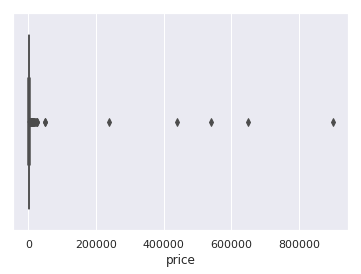

In [28]:
sns.boxplot(df.price);

In [29]:
df[df.price > 500000].text 

_id
1842771989165994    fully renovated single family near quincy center . 1500 + sf 2bed 1 1 / 2bath potential 1 or 2 bedroom in basement optional . brand new electrical plumbing hvac heat / ac spray foam insulation new siding new kitchen and bath detach car garage . still working on . can be delivered around end of jan . still has chance for you to select finishes and customize new construction condo .. in near quincy center ... quiet area ..
1409990622499307                                                                                                                                                                                                                                                                                                                                                                                                                2 bed 2 bath condo 1350 sqft
1397538513744518                                                                                          

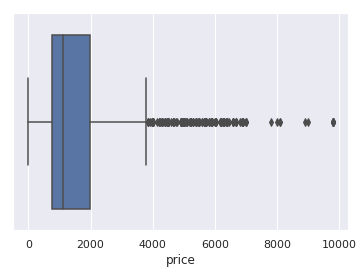

In [30]:
sns.boxplot(df[df.price < 10000].price);

In [31]:
df[(df.price > 8000)&(df.price < 10000)][['text', 'price']]

,text,price
_id,,
1480875522046385,"2 bed 1 bath available for rent in a 4 bedroom apartment in waltham , ma 2 / 1 / 19 . 1 bed is $ 800 2nd is $ 775 no pets allowed , laundry in basement . rooms will be unfurnished . snow removal included , free off street parking with room . 1st month and security upfront required . close to mbta , moody st ( bars and restaurants ), 7 min from riverside green line stop ! willing to flex with move in date if needed sooner - message me or liz sieracki for more details or if interested .",8002.0
1829066197203240,"excellent condition ! 68k miles ! backup camera ! works like brand new car and doesn ’ t need a single dollar on anything ! super clean , well maintained and in fantastic condition ! random quotes and time wasters stay away ! priced so low as it needs gone soon ! price is non - negotiable . serious buyers only . no discussions on price .",9800.0
1860610950715431,clean carfax and title ! super clean car ! everything works like brand new car and doesn ’ t need a single penny on anything my personal car which have maintained very nicely and overall an excellent car ready to go !,9800.0
1859101000866426,clean carfax and title ! super clean car ! everything works like brand new car and doesn ’ t need a single penny on anything my personal car which have maintained very nicely and overall an excellent car ready to go !,9800.0
1858203280956198,"excellent condition ! 68k miles ! backup camera ! works like brand new car and doesn ’ t need a single dollar on anything ! super clean , well maintained and in fantastic condition ! random quotes and time wasters stay away ! priced so low as it needs gone soon ! price is non - negotiable . serious buyers only . no discussions on price .",9800.0
1863097087133484,super clean car ! everything works like brand new car and doesn ’ t need a single penny on anything my personal car . i am not a dealer . have maintained very nicely and overall an excellent car ready to go ! clean title and carfax !,9800.0
1826590944117432,"brand new construction - luxury 6 bed / 2 bath - huge place . brand new construction !! two full baths , hardwood floors , deck . 6 bedrooms with ... cable and high speed internet ready . the modern kitchen comes with new stainless steel refrigerator , stove , dishwasher , microwave and granite counter top and is lined with wonderful custom cabinets ... laundry in unit ! private deck ! parking available ! rental features central air conditioning central heat hardwood floor tile floor living room dishwasher refrigerator stove / oven microwave granite countertop stainless steel appliances free washer / dryer cable - ready must see to believe ! call lydia @ 617 - 669 - 7334 to schedule a showing .",8100.0
1410867389078297,"clean carfax and title ! super clean car ! everything works like brand new car and doesn ’ t need a single penny on anything my personal car ( i am not a dealer ), which have maintained very nicely and overall an excellent car ready to go !",9800.0
1409560145875688,clean carfax and title ! super clean car ! everything works like brand new car and doesn ’ t need a single penny on anything my personal car which have maintained very nicely and overall an excellent car ready to go !,9800.0


Still trash

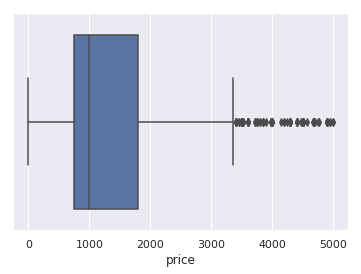

In [32]:
sns.boxplot(df[df.price < 5000].price);

In [33]:
df[(df.price > 4000)&(df.price < 8000)].text 

_id
1480217192112218                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             spot available for one male in a 2bed 2bath apartment at peterborough street . lease starting from january 20th to july 31 , 2019 . apartment details : rent : $ 617 1 . 10 min walk to northeastern university 2 . 1min walk to target and star market 3 . 5min walk to fenway t station 4 . 5 min walk to cvs 5 . 1min walk to bus stop 6 . friendly flatmates 7 . in house laundry p

In [34]:
df[(df.price < 400)][['text', 'price']]

,text,price
_id,,
1479867442147193,hi all ! iso studio / 1 br apt / or private room to rent through june . preference to n . of boston / merrimack valley . parking needed . no pets / smoking / etc . under $ 1k / month but may be flexible for the right fit . serious inquiries only . thank you !,1.0
1481460888654515,"seeking female to fill a room in a beautiful 3 bedroom apartment in the heart of jamaica plain , starting february 1st . either in grad school or a working professional . clean quiet , easygoing , nice , no smoking in the apartment . you would be living with two other women . i ' m leaving because of work . on one end of the block is jamaica pond , at the other is centre street / downtown jamaica plain , which has tons of cute and convenient shops . 10 minute walk from the orange line , 2 minute walk from the 39 bus line that goes straight into the heart of boston . washer and dryer in the unit . storage space in the basement . massive backyard . shared parking spot and ample street parking , especially in the evening . broker requests a fee of $ 350 for background checks and credit checks , as well as for creating the lease . also , $ 1000 security deposit . we look forward to meeting you ! message me for details .",350.0
1478940472239890,"room available for sublet in jamaica plain january 8 - 14 ! full size bed , small room but large common space . 5 minute walk from the orange line . roommates are musicians . $ 200 for the week , or we can negotiate for partial stay . dm me if you ’ re interested !",200.0
1478469722286965,"anyone looking for parking ? got a deeded parking space available in oak square for about $ 100 a month ( or $ 1 , 100 a year if paid up front ). close to i - 90 and roads leading to the metrowest . pm for details .",100.0
1488421641291773,"located in roxbury . selling bed frame , mattress , and dresser for only $ 250 . in great conditions , looks brand new ! please dm for serious inquiries",250.0
1489727054494565,"the spacious room for feb 1 . it ’ s large sunny room . 1 min to bus 15 / 18 , convenient to northeastern university area . 4 min to bus 215 , easy to quincy college . 4 min to red line t station , convenient to u mass , south station , downtown of boston , mgh / mit .... no smoking , no drugs , no drunk , no pet or loud music . add $ 100 for couple . looking for clean , quiet and responsible roommates massage me if u interest !!!",100.0
1489208854546385,"looking for someone to take over my lease from february or march 2019 , with possibility to renew in september ( to be negotiated directly with the landlord ). very spacious 1 bedroom , with high ceilings , laundry in unit , electric stove , garbage disposal , and dishwasher . the apartment is an in - law suit separate from the landlord ' s main single home with off street parking . there are no upstairs or downstairs neighbors . no pets . no smoking . the area is very quiet , surrounded by green . it can be a great place for a couple . five minutes walk from the arlington reservoir and whipple hill . i love this apartment , but i need to move into the city to be closer to my job . landlord requires deposit , first and last month , a photo copy of drivers license , and 3 months worth of pay stub . application is $ 39 . 99 for background and credit check .",39.0
1489882064479064,"posting again 1br in a 2br apartment available for feb 1st 20 minute walk to davis ( red line ) 5 minute bus ride to davis which is right down the street easy commute to 95 $ 1200 a month but somewhat negotiable roommate is a female in her 20s who works in boston storage and laundry in the basement , everything in the kitchen is updated , balcony , parking spot is possible it ’ s a great apartment , can be furnished or unfurnished",95.0
1489214327879171,"no fee , cleaning service and all utilities included , close to the t hi all , i ' m looking to fill my room in a newly refurbished ( 2018 ) 4 bed , 2 bath on auckland street ( between savin hill ave and bay

In [35]:
df = df[(df.price > 400)&(df.price < 8500)]

In [36]:
df.reset_index(inplace=True)
df.to_feather(DATA_PATH + 'housing_with_prices')